# 1. 水平翻轉避免逆向

In [1]:
import numpy as np
import cv2

#阿北原始圖片檔案
img =cv2.imread("a_bei.png")

img_flipped_vertical_cv = cv2.flip(img, 1)
cv2.imshow("a_bei_1", img_flipped_vertical_cv)
cv2.waitKey()
cv2.imwrite("a_bei_1.png", img_flipped_vertical_cv) # 儲存處理好之影像

True

# 2. 旋轉阿北貼緊地面(影像旋轉)(使用仿射轉換)

In [2]:
import cv2
import numpy as np

#經過第一個影像處理後的阿北照片
img = cv2.imread("a_bei_1.png")

#定義三個原座標
pts1 = np.float32([[190,140],[190,375],[310,140]])  
#定義三個目標座標，用於進行仿射變換
pts2 = np.float32([[160,165],[240,390],[270,125]])  

T = cv2.getAffineTransform(pts1,pts2) #使用cv2的getAffineTransform計算仿射變換矩陣
warp_img = cv2.warpAffine(img,T,(512,512))  #使用cv2的warpAffine方法進行仿射變換

cv2.imshow("a_bei_2",warp_img)  #顯示變換後的圖像
cv2.waitKey()  #等待用戶按鍵，用於暫停程序並保持顯示圖像
cv2.imwrite("a_bei_2.png", warp_img) #儲存處理好之影像

True

# 3. 縮放圖片將阿北縮小(影像縮放)

In [3]:
import cv2
#經過第二個影像處理後的阿北照片
img = cv2.imread('a_bei_2.png')

#修改大小
img = cv2.resize(img, (192, 240)) 

#顯示修改大小後的圖片
cv2.imshow("a_bei_3", img)
cv2.waitKey()

#儲存修改大小後的圖片
cv2.imwrite("a_bei_3.png", img)

True

# 4. 使用濾波對阿北進行基本的銳利化(影像濾波)(使用Sharpen濾波器)

In [4]:
#Sharpen濾波器為銳化濾波器
import os

from PIL import Image, ImageFilter
img = Image.open('a_bei_3.png') #經過第三個影像處理後的阿北照片
output = img.filter(ImageFilter.SHARPEN) #套用圖片銳利化
output.save('a_bei_4.png') #儲存處理好之影像

# 5. 使用影像模糊讓背景有追焦照的效果(影像模糊)(使用均值濾波)

In [5]:
import cv2

#背景原始圖片檔案
img = cv2.imread('seven_road.jpg')
output1 = cv2.blur(img, (3, 3)) #影像進行平均模糊，指定卷積核的大小為(3, 3)，表示取每個像素周圍 3x3 的區域，計算其平均值。

cv2.imshow('seven_road_5', output1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("seven_road_5.jpg", output1) #儲存處理好之影像

True

# 6.使用特徵擷取將阿北取出(特徵擷取)(使用Garb Cut)

In [6]:
import cv2
import numpy as np

#經過第四個影像處理後的阿北照片
imgnew = cv2.imread("a_bei_4.png")
newCopy = imgnew.copy()

b_Model = np.zeros((1,65),np.float64)
f_Model = np.zeros((1,65),np.float64)
rect1 = cv2.selectROI(imgnew) #選擇有興趣的區域 框住然後按空白鍵
cv2.destroyAllWindows()

In [7]:
x1,y1,w1,h1 = rect1 #rect1是一個list
print(x1,y1,w1,h1) #(x座標, y座標 ,w1:寬 ,h1:高)
mask_new,b_model,f_model=cv2.grabCut(imgnew,None,rect1,b_Model,f_Model,5,cv2.GC_INIT_WITH_RECT)
#沒有用mask所以第二個參數要填none,不然會拋錯,數字5是指跑5次
# grabcut會把算出來的結果存到 mask_new、b_Model、f_Model
mask_new

0 55 153 163


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
# Pixel value 0 => cv2.GC_BGD =>屬於背景
# Pixel value 1 => cv2.GC_FGD =>屬於前景
# Pixel value 2 => cv2.GC_PR_BGD=>可能屬於背景
# Pixel value 3 => cv2.GC_PR_FGD=>可能屬於前景

#做一個mask要區分背景或前景用
mask_new2 = np.where((mask_new==0)|(mask_new==2),0,1).astype('uint8') #mask_new==0 或 mask_new==2,0&2屬於背景就轉為0,其餘轉為1

In [9]:
#確認mask資料型態
np.unique(mask_new)
np.unique(mask_new2)

array([0, 1], dtype=uint8)

In [10]:
cv2.imshow("Mask_new2",mask_new2*255)
cv2.imwrite("mask_new2.jpg",mask_new2*255)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#mask_new2[:,:,np.newaxis].shape #check資料大小(要確保資料大小一致才能相乘)
#透過相乘，乘0的歸0，乘1的留下來
foreground = imgnew*mask_new2[:,:,np.newaxis]
cv2.imwrite("a_bei_6.png",foreground)
cv2.imshow("a_bei_6.png",foreground)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 7. 將阿北與背景和成(影像合成)

In [12]:
import cv2
import numpy as np

#經過第五個影像處理後的背景照片
foreground = foreground
background = cv2.imread('seven_road_5.jpg')

#確保背景和前景大小一致
background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))

#創建遮罩：非零像素（或非全黑像素）被視為前景
_, mask = cv2.threshold(cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)

#反遮罩，用於背景
mask_inv = cv2.bitwise_not(mask)

#從背景中去除將要放置前景的區域
background_part = cv2.bitwise_and(background, background, mask=mask_inv)

#從前景中提取物體
foreground_part = cv2.bitwise_and(foreground, foreground, mask=mask)

#結合阿北與背景
result = cv2.add(background_part, foreground_part)

#顯示結果
cv2.imshow('finally_7', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("finally_7.png", result)

True

# 8. 邊緣偵測模擬素描(邊緣檢測)(使用Canny邊緣檢測)

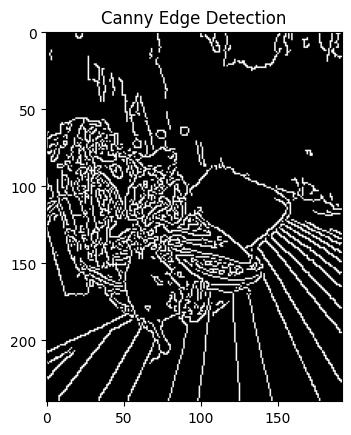

In [13]:
import cv2
import matplotlib.pyplot as plt

def canny_edge_detection(image_path, low_threshold, high_threshold):
    #讀取圖像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    #應用Canny邊緣檢測
    edges = cv2.Canny(image, low_threshold, high_threshold)

    #顯示結果
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.show()

    #儲存邊緣偵測的結果
    cv2.imwrite("finally_8.png", edges)

#讀取經過第七個影像處理後的合成照片
canny_edge_detection("finally_7.png", 100, 200)


# 9. 增加浮水印(在圖片上增加字體)

In [14]:
import cv2
from PIL import Image, ImageFont, ImageDraw

#經過第八個影像處理後的合成照片
img = Image.open('finally_8.png')

#準備在圖片上繪圖
draw = ImageDraw.Draw(img)
#將文字畫入圖片(fill=255為白色)
draw.text((130,40), 'WTFBoys', fill=(255))
img.save('finally_9.png')#儲存圖片
img.show()

# 10. 影像壓縮(使用優化與品質壓縮的影像處理技術)

In [15]:
from PIL import Image

#經過第九個影像處理後的合成照片
img = Image.open("finally_9.png")

# optimize為優化 PNG 圖像的大小，以減少文件大小。
# quality為壓縮等級，0 (最低品質) ~ 9 (最高品質)
img.save("finally_10.png", format="PNG", optimize=True, quality=0)
img.show()